<a href="https://github.com/hernansalinas/autogrades/tree/main/Evaluaciones/Evaluacion01_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Parcial 01: Metodos computacionales para fisicos 
### Fecha 3/30/23

La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno. 

## 1. (50%). Movimiento de una esfera de radio r en un fluido.

 Una esfera de radio $R$ que asciende o desciende por un fluido puede ser modelada a través de un modelo de partícula, sometida a tres fuerzas: el peso, el empuje y la fuerza rozamiento. Las  ecuaciones de posición (x) y velocidad (v) para un sistema de refencia úbicado en la base del fluido, pueden ser escritas como:

\begin{equation}
x = \frac{G}{\alpha} \left( 1+\frac{\alpha v_0}{G} \right)(1-e^{-\alpha t}) - \frac{G}{\alpha}t
\end{equation}

\begin{equation}
v= \left ( v_0 +\frac{G}{\alpha} \right )e^{-\alpha t} - \frac{G}{\alpha}
\end{equation}



donde $G=\left( 1-\frac{\rho_f}{\rho} \right)g$, con $\rho_f$, $\rho$ la densidad del fluido y la esfera respectivamente y $g=9.8$ la aceleración de la gravedad y $\alpha$  una constante que depende del radio de la esfera, la viscosidad y la densidad.
$\alpha=\frac{9\eta}{2R^2\rho}$.

Suponga que una esferita de radio $R=2\times10^{-5}m$ es lanzada verticalmente hacia arriba en el agua, con una rapidez de $v_0=0.01$m/s.
Tomando la densidad del agua en  $\rho_f =1000 kg/m^3$,  la densidad de la esfera en $\rho=2670 kg/m^3$ y la viscosidad en $\eta=0.001 kg/ms$.  Determine: 

1. El tiempo total en que la esfera asciende  y desciende. 

2. Determine la rapidez final, con la que llega nuevamente de donde fue lanzada. 



Para ello construya un programa en python que:
- Permita calcular la posición como función del tiempo
- Permita calcular la rapidez como función del tiempo
- Cálcule  el tiempo total de subida y bajada empleando el método de la secante.

 






In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

In [32]:
#Primero vamos a definir las funciones de posición y velocidad
#Definamos las variables iniciales:
densidadAgua = 1000
densidadEsfera = 2670
viscosidad = 0.001
R = 2E-5
v0 = 0.01
g = 9.8
G_ = (1-densidadAgua/densidadEsfera)*g
alpha_ = (9*viscosidad)/(2*(R**2)*densidadEsfera)
#Definamos la función de la posición en función del tiempo
def posicion(t,G = G_,alpha = alpha_):
  return (G/(alpha**2))*(1 + (alpha*v0/G))*(1 - np.exp(-alpha*t)) - (G/alpha)*t

#Definamos la función de la rapidez en función del tiempo.
def velocidad(t, G = G_, alpha = alpha_):
  return (v0 + (G/alpha))*np.exp(-alpha*t) - (G/alpha)

Realicemos una gráfica de posición vs tiempo para tener una idea general de la trayectoria de la esfera

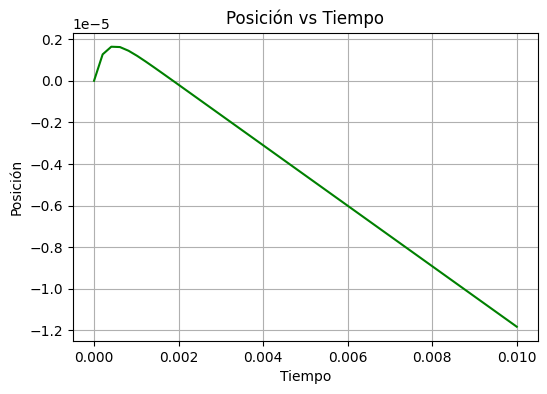

In [105]:
tiempo = np.linspace(0,0.01)
y = posicion(tiempo)
plt.figure(figsize=(6,4))
plt.plot(tiempo,y,color='green',)
plt.title('Posición vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid()
plt.show()

1. Calcular el tiempo total en que la esfera asciende y desciende.

Para esto, vamos a tomar el tiempo cuando la posición es nuevamente cero.
Como vemos en la gráfica, un punto cercano al cero es $0.02$ por lo que vamos a tomar este punto para hallar la raíz de la función, es decir, el punto donde $x = 0$

In [117]:
tiempoTotal = round(sp.optimize.newton(posicion,0.02),5)
print(f'El tiempo total en que la esfera asciende y desciende es de: {tiempoTotal} segundos')

El tiempo total en que la esfera asciende y desciende es de: 0.00187 segundos


2. Determine la rapidez final, con la que llega nuevamente de donde fue lanzada. \

Para esto, evaluamos la función de la velocidad en el tiempo máximo hallado en el numeral 1.

In [118]:
rapidezFinal = round(abs(velocidad(tiempoTotal)),5)
print(f'La rapidez final es {rapidezFinal} m/s')

La rapidez final es 0.00145 m/s


Despreciamos el menos que sale de la expresión de velocidad por ser una magnitud

## 2. (50%). Interpolación
Para los siguientes datos de temperatura media como función del tiempo de los últimos años de  Bogotá y Barcelona ([Temperature_Bogota_Barcelona](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)). Aplique el método de  hermite y spline cúbicos. Para ello realice lo siguiente:

1. Leer el dataset desde la url, con el comando pd.read_csv.
2. Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius. $ C=(F-32)/1.8$
3. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.
4. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Barcelona.
4. Aplique el  metodos de interpolación de hermite para Bogotá y el metodo de interpolación de splines cubicos para Barcelona. 


Ayuda :

| Comando | Descripción |
| --- | --- |
| pd.read_csv() | Lee un archivo CSV y lo convierte en un DataFrame de Pandas |
| pd.read_excel() | Lee un archivo de Excel y lo convierte en un DataFrame de Pandas |
| pd.read_json() | Lee un archivo JSON y lo convierte en un DataFrame de Pandas |
| df.head() | Muestra las primeras filas del DataFrame |
| df.tail() | Muestra las últimas filas del DataFrame |
| df.info() | Muestra información sobre el DataFrame |
| df.describe() | Muestra estadísticas descriptivas del DataFrame |
| df.dropna() | Elimina filas con valores faltantes |
| df.drop_duplicates() | Elimina filas duplicadas |
| df.groupby() | Agrupa el DataFrame por una o más columnas |
| df.sort_values() | Ordena el DataFrame por una o más columnas |
| df.to_csv() | Guarda el DataFrame como un archivo CSV |
| df.loc[condicion] | Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones |
| df[df["columna"]== x] | Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable |


Referencias: 

- Dataset tomado y modificado de : https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

- http://www.sc.ehu.es/sbweb/fisica3/fluidos/stokes_1/stokes_1.html
- Lindemuth J. The effect of air resistance on falling balls. Am. J. Phys. 39, July 1971, pp. 757-759

1. Leer el dataset desde la url, con el comando pd.read_csv.


In [66]:
url = 'https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Year,City,Month,Day,AvgTemperature
0,0,1995,Barcelona,6.526027,15.720548,62.019178
1,1,1995,Bogota,6.526027,15.720548,54.963014
2,2,1996,Barcelona,6.513661,15.756831,61.125956
3,3,1996,Bogota,6.513661,15.756831,55.083333
4,4,1997,Barcelona,6.526027,15.720548,62.612329


2. Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius. $ C=(F-32)/1.8$

In [67]:
df['AvgTempCelcius'] = (df['AvgTemperature']-32)/1.8
df.head()

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius
0,0,1995,Barcelona,6.526027,15.720548,62.019178,16.677321
1,1,1995,Bogota,6.526027,15.720548,54.963014,12.757230
2,2,1996,Barcelona,6.513661,15.756831,61.125956,16.181087
3,3,1996,Bogota,6.513661,15.756831,55.083333,12.824074
4,4,1997,Barcelona,6.526027,15.720548,62.612329,17.006849


3. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.

In [68]:
#Definamos la máscara para obtener solo las filas que sean Bogotá
mascara1 = df['City']=='Bogota'
#Creemos un nuevo df para Bogotá
bogota = df[mascara1]
bogota.head()

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius
1,1,1995,Bogota,6.526027,15.720548,54.963014,12.757230
3,3,1996,Bogota,6.513661,15.756831,55.083333,12.824074
5,5,1997,Bogota,6.526027,15.720548,56.231507,13.461948
7,7,1998,Bogota,6.526027,15.720548,49.642466,9.801370
9,9,1999,Bogota,6.526027,15.720548,52.231781,11.239878


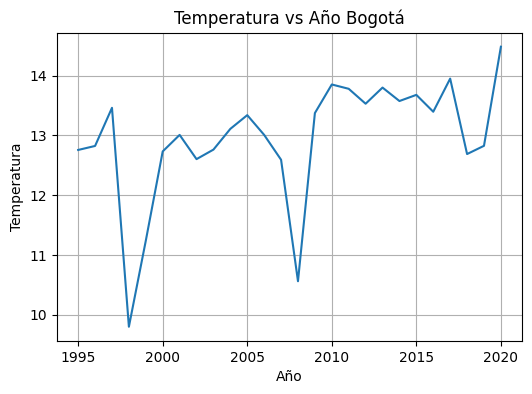

In [108]:
#Ahora realizemos la gráfica
x1 = bogota['Year']
y1 = bogota['AvgTempCelcius']
plt.figure(figsize=(6,4))
plt.plot(x1,y1)
plt.title('Temperatura vs Año Bogotá')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.grid()
plt.show()

4. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Barcelona.

In [70]:
#Definamos la máscara para obtener solo las filas que sean Barcelona
mascara2 = df['City']=='Barcelona'
#Creemos un nuevo df para Bogotá
barcelona = df[mascara2]
barcelona.head()

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius
0,0,1995,Barcelona,6.526027,15.720548,62.019178,16.677321
2,2,1996,Barcelona,6.513661,15.756831,61.125956,16.181087
4,4,1997,Barcelona,6.526027,15.720548,62.612329,17.006849
6,6,1998,Barcelona,6.526027,15.720548,60.273973,15.707763
8,8,1999,Barcelona,6.526027,15.720548,61.204658,16.224810


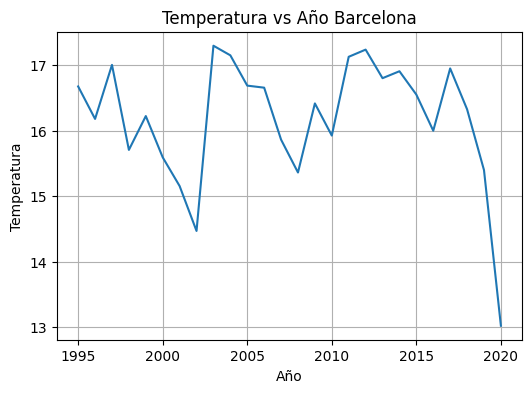

In [110]:
#Ahora realizemos la gráfica
x2 = barcelona['Year']
y2 = barcelona['AvgTempCelcius']
plt.figure(figsize=(6,4))
plt.plot(x2,y2)
plt.title('Temperatura vs Año Barcelona')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.grid()
plt.show()

5. Aplique el  metodos de interpolación de hermite para Bogotá y el metodo de interpolación de splines cubicos para Barcelona. 

###Hermite para Bogotá

In [90]:
#Para aplicar este método necesitamos la derivada
derivada = np.diff(bogota['AvgTempCelcius'])
interpolacionBogota = sp.interpolate.CubicHermiteSpline(x1[1:],y1[1:],derivada)

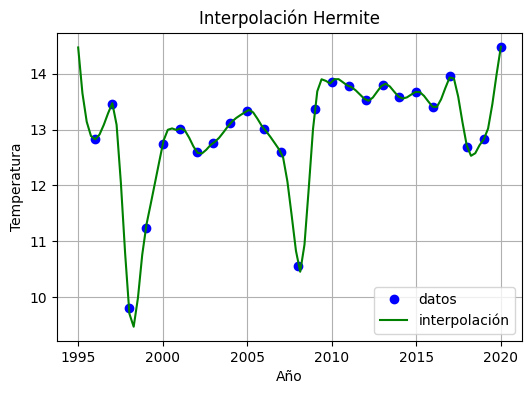

In [115]:
xx1 = np.linspace(1995,2020,100)
plt.figure(figsize=(6,4))
plt.plot(x1[1:],y1[1:],'bo',label='datos')
plt.plot(xx1,interpolacionBogota(xx1),color='green',label='interpolación');
plt.title('Interpolación Hermite')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.grid()
plt.legend()
plt.show()

###Splines Cúbicos Barcelona

In [76]:
#Hallemos el polinimo
interpolacionBarcelona = sp.interpolate.CubicSpline(x2,y2)

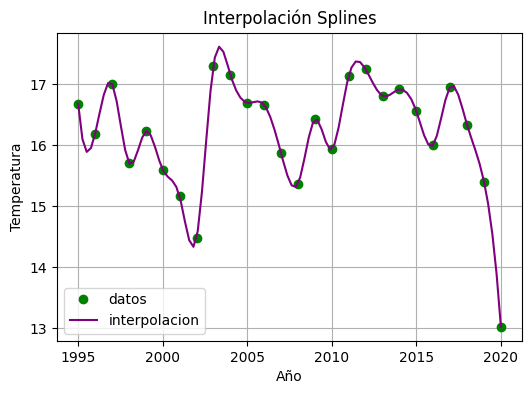

In [116]:
xx2 = np.linspace(1995,2020,100)
plt.figure(figsize=(6,4))
plt.plot(x2,y2,'go',label='datos')
plt.plot(xx2,interpolacionBarcelona(xx2),color='purple',label='interpolacion')
plt.title('Interpolación Splines')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.grid()
plt.legend()
plt.show()